In [1]:
import pandas as pd

In [2]:
movies= pd.read_csv("movies.csv",encoding='latin-1')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
ratings= pd.read_csv('ratings.csv')

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings['userId'].value_counts()

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64

In [10]:
ratings['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
ratings['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [12]:
ratings['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [15]:
movie_name = movies[movies['movieId'] == 356]['title'].values[0]

print(f"The movie name with movieId {356} is: {movie_name}")

The movie name with movieId 356 is: Forrest Gump (1994)


In [16]:
tags=pd.read_csv('tags.csv')

In [17]:
movie_id = movies[movies['title'] == "Matrix, The (1999)"]['movieId'].values[0]

# Step 2: Find all tags for the identified movieId
matrix_tags = tags[tags['movieId'] == movie_id]['tag'].unique()

print(f"Tags for 'Matrix, The (1999)': {list(matrix_tags)}")

Tags for 'Matrix, The (1999)': ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [18]:
movie_id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Step 2: Find all ratings for the identified movieId
terminator_ratings = ratings[ratings['movieId'] == movie_id]['rating']

# Step 3: Calculate the average rating
average_rating = terminator_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


In [19]:
rating_counts = ratings.groupby('movieId').size()

# Step 2: Find the movieId with the maximum ratings
max_ratings_movie_id = rating_counts.idxmax()
max_ratings_count = rating_counts.max()

# Step 3: Get the movie title for the movieId with the maximum ratings
max_rated_movie_title = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]

print(f"The movie with the maximum number of ratings is '{max_rated_movie_title}' with {max_ratings_count} ratings.")

The movie with the maximum number of ratings is 'Forrest Gump (1994)' with 329 ratings.


C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


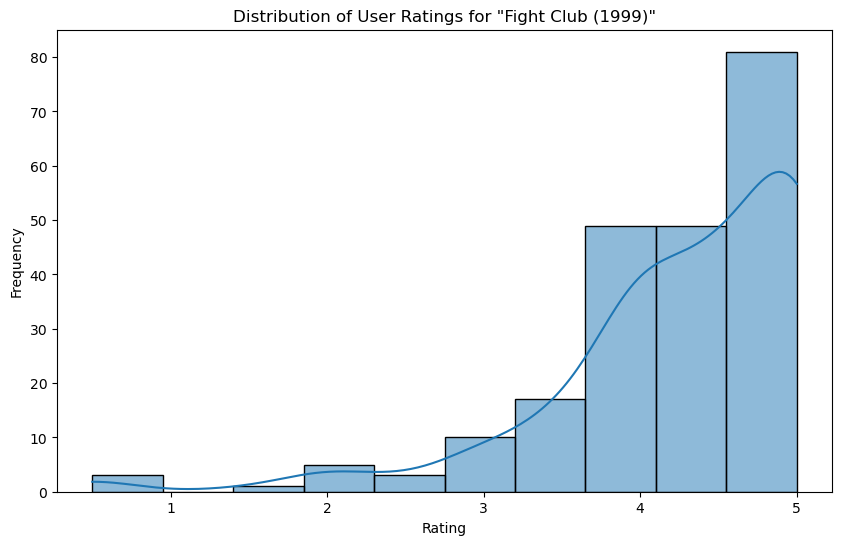

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

movie_id = movies[movies['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Step 2: Extract ratings for "Fight Club (1999)"
fight_club_ratings = ratings[ratings['movieId'] == movie_id]['rating']

# Step 3: Plot the distribution of ratings

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
grouped_ratings = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join with movies dataframe
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the filtered dataframe
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [25]:
most_popular_movie = filtered_df.sort_values(by='rating_mean', ascending=False).iloc[0]

# Display the most popular movie
print(f"The most popular movie based on average user ratings is '{most_popular_movie['title']}' with an average rating of {most_popular_movie['rating_mean']:.2f}.")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


In [26]:
top_5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 most popular movies
print("Top 5 most popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 most popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [27]:
sci_fi_df = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Step 5: Sort Sci-Fi movies by number of user ratings
sorted_sci_fi_df = sci_fi_df.sort_values(by='rating_count', ascending=False)

# Step 6: Get the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_df.iloc[2]

# Display the third most popular Sci-Fi movie
print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi_movie['title']}' with {third_most_popular_sci_fi_movie['rating_count']} user ratings.")

The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 user ratings.


In [28]:
links= pd.read_csv('links.csv')

In [29]:
filtered_df


,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [30]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [32]:
import requests
from bs4 import BeautifulSoup
import os

def scrape_imdb_reviews(imdb_id):
    reviews = []
    url = f"https://www.imdb.com/title/{imdb_id}/reviews"
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the review elements - This may need adjustments based on IMDB's HTML structure
        review_elements = soup.find_all('div', class_='text show-more__control')
        for review in review_elements:
            reviews.append(review.get_text())

    except Exception as e:
        print(f"Error scraping {url}: {e}")

    return reviews

# Create a directory to save the reviews
os.makedirs('reviews', exist_ok=True)

# Scrape reviews for each movie
for index, row in merged_df.iterrows():
    imdb_id = row['imdbId']
    reviews = scrape_imdb_reviews(imdb_id)
    
    # Save reviews to a file
    with open(f"reviews/{row['title'].replace('/', '_')}_reviews.txt", 'w', encoding='utf-8') as f:
        for review in reviews:
            f.write(f"{review}\n\n")

    print(f"Reviews for {row['title']} have been saved.")

KeyError: 'imdbId'

In [33]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [35]:
merged_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [49]:
merged_df = pd.merge(movies, links, on='movieId', how='inner')

# Check the merged DataFrame
print("Merged DataFrame:")
merged_df.head()

Merged DataFrame:


,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [50]:
merged_df = pd.merge(filtered_df, links, on='movieId', how='inner')
merged_df.head()

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [61]:
import requests
from bs4 import BeautifulSoup
import os

def scrape_imdb_reviews(imdb_id):
    reviews = []
    url = f"https://www.imdb.com/title/{imdb_id}/reviews"
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the review elements - Adjust selectors based on IMDB's HTML structure
        review_elements = soup.find_all('div', class_='text show-more__control')
        for review in review_elements:
            reviews.append(review.get_text())

    except Exception as e:
        print(f"Error scraping {url}: {e}")

    return reviews

# Create a directory to save the reviews


def sanitize_filename(filename):
    # Replace characters that are not allowed in file names
    return filename.replace('/', '_').replace('\\', '_').replace(':', '_').replace('*', '_').replace('?', '_').replace('"', '_').replace('<', '_').replace('>', '_').replace('|', '_')

# Ensure the 'reviews' directory exists
os.makedirs('reviews', exist_ok=True)

# Example code to save reviews to a file
for index, row in merged_df.iterrows():
    imdb_id = row['imdbId']
    reviews = scrape_imdb_reviews(imdb_id)
    
    # Sanitize the movie title to create a valid file name
    file_name = sanitize_filename(f"{row['title']}_reviews.txt")
    file_path = os.path.join('reviews', file_name)
    
    try:
        with open(file_path, 'w', encoding='utf-8') as f:
            for review in reviews:
                f.write(f"{review}\n\n")
    except OSError as e:
        print(f"Error saving reviews for {row['title']}: {e}")


KeyboardInterrupt: 

In [43]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_div = soup.find('span', itemprop='ratingValue')
        if rating_div:
            rating = float(rating_div.text.strip())
            return rating
    except Exception as e:
        print(f"Error fetching rating for IMDB ID {imdb_id}: {e}")
    return None

# Add a column for IMDB ratings
merged_df['imdb_rating'] = merged_df['imdbId'].apply(get_imdb_rating)

# Drop rows where rating is None (failed to fetch rating)
merged_df = merged_df.dropna(subset=['imdb_rating'])

# Find the movie with the highest IMDB rating
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]

# Display the movieId of the highest rated movie
print(f"MovieId with the highest IMDB rating: {highest_rated_movie['movieId']}")

KeyboardInterrupt: 

In [51]:
def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/"
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_div = soup.find('span', itemprop='ratingValue')
        if rating_div:
            rating = float(rating_div.text.strip())
            return rating
    except Exception as e:
        print(f"Error fetching rating for IMDB ID {imdb_id}: {e}")
    return None

In [58]:
import requests
from bs4 import BeautifulSoup

def get_imdb_rating(imdb_id):
    """
    Fetches the IMDb rating for a given movie using its IMDb ID.

    Parameters:
    imdb_id (str): The IMDb ID of the movie (e.g., 'tt0114709').

    Returns:
    float: The IMDb rating of the movie, or None if the rating cannot be fetched.
    """
    url = "https://www.imdb.com/title/{imdb_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Look for the rating element with a different selector
        rating_div = soup.find('span', {'class': 'sc-16r8icm-2'}).find('span')
        
        if rating_div:
            rating = float(rating_div.text.strip())
            return rating
        else:
            print(f"Rating not found for IMDb ID {imdb_id}")
    except requests.RequestException as e:
        print(f"Request error for IMDb ID {imdb_id}: {e}")
    except Exception as e:
        print(f"Error fetching rating for IMDb ID {imdb_id}: {e}")
    return None

merged_df['imdb_rating'] = merged_df['imdbId'].apply(get_imdb_rating)


Request error for IMDb ID 114709: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 113497: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 113228: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 113277: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 114319: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 113189: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 112346: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 112641: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 114388: 404 Client Error:  for url: https://www.imdb.com/title/%7Bimdb_id%7D
Request error for IMDb ID 112281: 404 Client Error:  for url: https://www

In [46]:
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]

# Display the movieId of the highest rated movie
print(f"MovieId with the highest IMDB rating: {highest_rated_movie['movieId']}")

ValueError: attempt to get argmax of an empty sequence

In [53]:
merged_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,None
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,None
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,None
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,None
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,None
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,None
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,None
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,None
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,None


In [62]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Merge with links to get IMDB IDs
merged_df = pd.merge(filtered_df, links, on='movieId', how='inner')

# Ensure the 'reviews' directory exists
os.makedirs('reviews', exist_ok=True)

def scrape_imdb_reviews(imdb_id):
    url = f"https://www.imdb.com/title/{imdb_id}/reviews"
    reviews = []
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        review_blocks = soup.find_all('div', class_='text show-more__control')
        for block in review_blocks:
            reviews.append(block.get_text(strip=True))
    except Exception as e:
        print(f"Request error for IMDb ID {imdb_id}: {e}")
    return reviews

# Scrape and save reviews for each movie
for index, row in merged_df.iterrows():
    imdb_id = row['imdbId']
    reviews = scrape_imdb_reviews(imdb_id)
    
    # Sanitize the movie title to create a valid file name
    file_name = row['title'].replace('/', '_').replace('\\', '_').replace(':', '_').replace('*', '_').replace('?', '_').replace('"', '_').replace('<', '_').replace('>', '_').replace('|', '_')
    file_path = os.path.join('reviews', f"{file_name}_reviews.txt")
    
    try:
        with open(file_path, 'w', encoding='utf-8') as f:
            for review in reviews:
                f.write(f"{review}\n\n")
    except OSError as e:
        print(f"Error saving reviews for {row['title']}: {e}")

print("Review scraping and saving completed.")

Review scraping and saving completed.


In [63]:
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]

# Display the movieId of the highest rated movie
print(f"MovieId with the highest IMDB rating: {highest_rated_movie['movieId']}")

KeyError: 'imdb_rating'